# Cookie Testing

## What is Cookie Testing?

* Cookie Testing is defined as a Software Testing type that checks the Cookie created in your web browser.
* A cookie is a small piece of information that is stored in a text file on the user's (client) hard drive by the web server.
* This piece of information is then sent back to the server each time the browser requests a page from the server. 
* Usually, the cookie contains personalized user data or information that is used to communicate between different web pages. 

The screenshot below shows cookies for different websites.

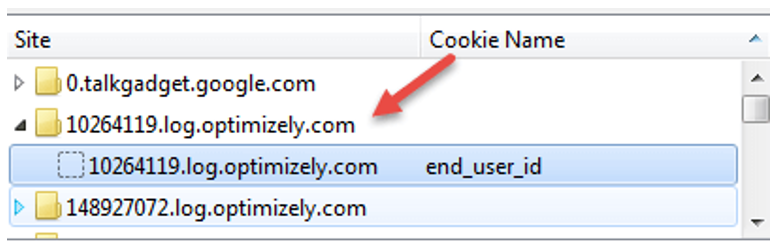

* In other words, cookies are nothing but a user's identity and are used to track where the user navigated throughout the pages of the website. 
* The purpose of a cookie is to make rapid interaction between users and websites.
* Applications, where cookies can be used, are to implement a shopping cart, personalized web experience, user tracking, marketing, user sessions, etc.

## What is the Content of Cookie?

The cookie consists of mainly three things:
* The name of the server the cookie was sent from.
* Cookies Lifetime.
* A value. This is usually a randomly generated unique number.

## Types of Cookies

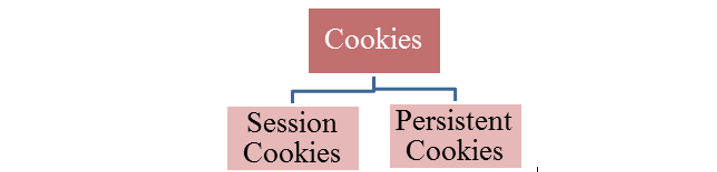

Usually, there are two types of cookies written on user machines:

**Session Cookies**: 
* These cookies are active till the browser that triggers the cookie is open.
* When we close the browser this session cookie gets deleted.

**Persistent Cookies**: These cookies are written permanently on the user's machine and it lasts for months or years.

## Where Cookies are stored?

* When any web page application writes a cookie, it is stored in a text file on the user's hard disk drive.
* The path where the cookies are saved depends on the browser.
* **Different browsers store cookies in different paths**.

For example, in **Mozilla Firefox** browser you can see the cookies in browser options. 

To view this click on **`Tools -> Options -> Privacy`** and then click on **`Remove Individual Cookies`**.

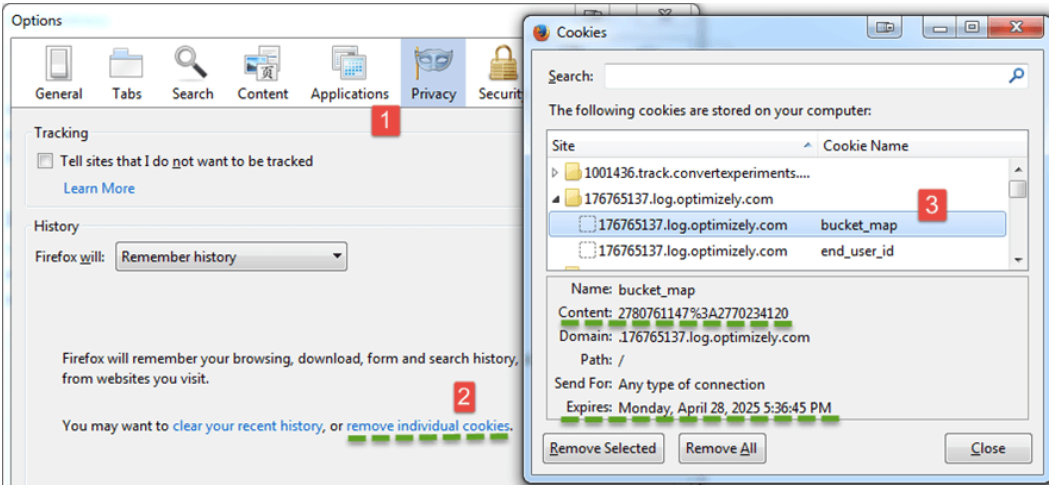

While in **Internet Explorer** browser it stores cookies on path **`C:\Documents and Settings\Default User\Cookies`**

## How to test Cookies?

Following is an important checklist to test cookies in Software Engineering.

1. **Disabling cookies**: Disable all cookies and attempt to use the site's major functions.

2. **Corrupting cookies**: Manually edit the cookie in Notepad and change the parameters with some random values.

3. **Cookies encryption**: Sensitive information like passwords and usernames should be encrypted before it is sent to our computer.

4. **Cookie testing with multiple browsers**: Check your website page is writing the cookies properly on a different browser as expected.

5. **Checking the deletion from your web application page**.

6. **Selectively rejecting cookies**: Delete all the cookies for the websites and see how the website reacts to them.

7. **Access to cookies**: Cookies written by one website should not be accessible by others.

8. **No overuse of cookies**: If the application under test is a public website, there should not be overuse of cookies

9. **Testing with the different settings**: Testing should be done properly to check that the website is working well with different cookie setting

10. **Categorize cookies separately**: Cookies should not be kept in the same category of the viruses, spam, or spyware

## Difference between Cookie and Session?

**Cookie**:
* Cookies are client-side files that contain user information.
* Cookie ends depending on the lifetime you set for it.
* The official maximum cookie size is 4KB.
* A cookie is not dependent on Session.

**Session**:
* Sessions are server-side files that contain user information.
* A session ends when a user closes his browser.
* Within-session you can store as much data as you like.
* The only limit you can reach is the maximum memory a script can consume at one time, which is **`128 MB`** by default.
* A session is dependent on Cookie.

# Handling Cookies

* A HTTP cookie is comprised of information about the user and their preferences.
* It stores information using a key-value pair.
* It is a small piece of data sent from Web Application and stored in Web Browser, while the user is browsing that website.

**The Selenium webdriver class provides some methods using which we can query and interact with cookies.**

**`get_cookies()`**:
* Returns a set of dictionaries, corresponding to cookies visible in the current session.
* **Usage**: `driver.get_cookies()`

**`get_cookie(name)`**:
* Get a single cookie by name. Returns the cookie if found, None if not.
* **Usage**:  `driver.get_cookie('my_cookie')`

**`delete_cookie(name)`**:
* Deletes a single cookie with the given name.
* **Usage**: `driver.delete_cookie('my_cookie')`

**`delete_all_cookies(self)`**:
* Delete all cookies in the scope of the session.
* **Usage**: `driver.delete_all_cookies()`

**`add_cookie(cookie_dict)`**:
* Adds a cookie to your current session.
* **cookie_dict**:
    * A dictionary object, with required keys - "name" and "value";
    * Optional keys - "path", "domain", "secure", "expiry"
* **`Usage`**:
    * `driver.add_cookie({'name' : 'foo', 'value' : 'bar'})`
    * `driver.add_cookie({'name' : 'foo', 'value' : 'bar', 'path' : '/'})`
    * `driver.add_cookie({'name' : 'foo', 'value' : 'bar', 'path' : '/', 'secure':True})`

**Example**:

```
# Go to the correct domain
driver.get("http://www.example.com")

# Now set the cookie. This one's valid for the entire domain.
cookie = {'name': 'foo', 'value': 'bar'}
driver.add_cookie(cookie)

# Add now output all the available cookies for the current URL
cookies = driver.get_cookies()
```

## Why Handle Cookies in Selenium?

Each cookie is associated with a `name`, `value`, `domain`, `path`, `expiry`, and **the status of whether it is secure or not**. In order to validate a client, a server parses all of these values in a cookie.

When Testing a web application using the selenium web driver, you may need to create, update, or delete a cookie.

For example, when automating an Online Shopping Application, you may need to automate test scenarios like:
* placing an order,
* viewing a cart,
* Payment Information,
*  order confirmation, etc.

If cookies are not stored, you will need to perform a login action every time before you execute above listed test scenarios. 

This will increase your coding effort and execution time.

The solution is to store cookies in a File. Later, retrieve the values of the cookie from this file and add to it your current browser session. As a result, you can skip the login steps in every Test Case because your driver session has this information in it.

The application server now treats your browser session as authenticated and directly takes you to your requested URL.


## Demo: Cookie handling in Selenium

**NOTE**:  you need to be on the domain (i.e. site) that the cookie will be valid for.

* **Step 1**: Login into application and store the authentication cookie generated.
* **Step 2**: Used the stored cookie, to again login into application without using userid and password.



```
import time

from selenium import webdriver
from selenium.webdriver.common.by import By

# STEP 1: Login into application and store the authentication cookie generated.
driver = webdriver.Chrome()
driver.maximize_window()

driver.get("https://www.demo.guru99.com/test/cookie/selenium_aut.php")
driver.find_element(By.XPATH,"//input[@name='username']").send_keys("abc123")
driver.find_element(By.XPATH,"//input[@name='password']").send_keys("123xyz")
driver.find_element(By.XPATH,"//button[@name='submit']").submit()

cookies = driver.get_cookies()
print(cookies)
driver.close()

# STEP 2: Used the stored cookie, to again login into application without using userid and password.

driver = webdriver.Chrome()
driver.maximize_window()

# Entering in to the domain first to use cookie
driver.get('http://demo.guru99.com/test/cookie/selenium_aut.php')
time.sleep(2)

for cookie in cookies:
    cookie['domain'] = "guru99.com"
    driver.add_cookie(cookie)

time.sleep(2)
driver.refresh()

login_text = driver.find_element(By.XPATH,"//center").text
if(login_text == "You are logged In"):
    print("Authenticated using stored cookie and logged in successfully")
driver.close()

driver.quit()
```

We have successfully stored all cookie information along with **`Name`**, **`Value`**, **`Domain`**, **`Path`**.

**Below are the stored cookies**:

`[{'domain': '.guru99.com', 'expiry': 1773653831, 'httpOnly': False, 'name': '_ga', 'path': '/', 'sameSite': 'Lax', 'secure': False, 'value': 'GA1.2.1471652125.1739093830'}, {'domain': '.guru99.com', 'expiry': 1739093890, 'httpOnly': False, 'name': '_gat_gtag_UA_1248015_24', 'path': '/', 'sameSite': 'Lax', 'secure': False, 'value': '1'}, {'domain': '.guru99.com', 'expiry': 1739180231, 'httpOnly': False, 'name': '_gid', 'path': '/', 'sameSite': 'Lax', 'secure': False, 'value': 'GA1.2.40386799.1739093830'}, {'domain': 'www.demo.guru99.com', 'httpOnly': False, 'name': 'Selenium', 'path': '/test/cookie', 'sameSite': 'Lax', 'secure': False, 'value': 'abc123'}]`

Next, we will use these stored cookies, to again log into the application without using user-id and password.
1. Go to the domain first to use the cookie by navigating to the URL.
2. Initially it will prompt for user-id and password.
3. Set the cookies with the proper domain.
4. Refresh the page to **authenticate using the set cookies**.
5. The user logged in successfully without a user ID and password.

> ***NOTE**: Thus, you can avoid entering the username and password on the server validating them again and again for each test with the help of Selenium Webdriver, and thereby saves a lot of time*.
